In [ ]:
!gdown '1958YBOMRTbpRGeCk8idUsR3Q6zORU-T7'

Downloading...
From: https://drive.google.com/uc?id=1958YBOMRTbpRGeCk8idUsR3Q6zORU-T7
To: /content/Nacimientobalanceado.csv
100% 6.66M/6.66M [00:00<00:00, 112MB/s]


[Multitask Learning Pytorch](https://github.com/snorkel-team/snorkel-tutorials/blob/master/multitask/multitask_tutorial.ipynb)

In [ ]:
import pandas as pd

df = pd.read_csv('Nacimientobalanceado.csv')

In [ ]:
df.dtypes

AREANAC        object
SIT_PARTO      object
SEXO           object
PESO_NAC      float64
MES           float64
ATEN_PAR       object
T_GES         float64
NUMCONSUL     float64
TIPO_PARTO     object
MUL_PARTO      object
IDHEMOCLAS     object
IDFACTORRH     object
EDAD_MADRE    float64
EST_CIVM       object
NIV_EDUM       object
N_HIJOSV      float64
N_EMB         float64
SEG_SOCIAL     object
EDAD_PADRE    float64
NIV_EDUP       object
COMUNA_RES     object
BAJO_PESO      object
dtype: object

In [ ]:
df[['AREANAC', 'SIT_PARTO','SEXO','ATEN_PAR','TIPO_PARTO','MUL_PARTO','IDHEMOCLAS','IDFACTORRH','EST_CIVM','NIV_EDUM','SEG_SOCIAL','NIV_EDUP','COMUNA_RES','BAJO_PESO']] = df[['AREANAC', 'SIT_PARTO','SEXO','ATEN_PAR','TIPO_PARTO','MUL_PARTO','IDHEMOCLAS','IDFACTORRH','EST_CIVM','NIV_EDUM','SEG_SOCIAL','NIV_EDUP','COMUNA_RES','BAJO_PESO']].apply(lambda x: pd.factorize(x)[0])

In [ ]:
df

,AREANAC,SIT_PARTO,SEXO,PESO_NAC,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,MUL_PARTO,...,EDAD_MADRE,EST_CIVM,NIV_EDUM,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,COMUNA_RES,BAJO_PESO
0,0,0,0,4100.0,2.0,0,39.0,8.0,0,0,...,27.0,0,0,1.0,1.0,0,29.0,0,0,0
1,0,0,0,3195.0,4.0,0,38.0,8.0,0,0,...,23.0,1,0,2.0,2.0,1,22.0,0,1,0
2,0,0,1,3090.0,6.0,0,39.0,8.0,0,0,...,21.0,2,0,1.0,1.0,1,21.0,0,2,0
3,0,0,0,3860.0,4.0,0,40.0,7.0,1,0,...,34.0,1,0,2.0,2.0,2,31.0,1,3,0
4,0,0,1,3270.0,12.0,0,40.0,10.0,0,0,...,19.0,2,1,2.0,2.0,2,21.0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32105,0,0,1,2455.0,1.0,0,37.0,8.0,0,0,...,22.0,1,4,2.0,3.0,1,24.0,0,12,1
32106,0,0,0,2440.0,2.0,0,35.0,6.0,0,0,...,23.0,3,0,2.0,2.0,1,29.0,1,13,1
32107,0,0,1,675.0,2.0,0,24.0,4.0,1,0,...,37.0,3,2,3.0,4.0,1,38.0,0,12,1
32108,0,0,1,2455.0,1.0,0,35.0,6.0,0,0,...,26.0,3,2,1.0,1.0,1,29.0,0,3,1


In [ ]:
df.dtypes

AREANAC         int64
SIT_PARTO       int64
SEXO            int64
PESO_NAC      float64
MES           float64
ATEN_PAR        int64
T_GES         float64
NUMCONSUL     float64
TIPO_PARTO      int64
MUL_PARTO       int64
IDHEMOCLAS      int64
IDFACTORRH      int64
EDAD_MADRE    float64
EST_CIVM        int64
NIV_EDUM        int64
N_HIJOSV      float64
N_EMB         float64
SEG_SOCIAL      int64
EDAD_PADRE    float64
NIV_EDUP        int64
COMUNA_RES      int64
BAJO_PESO       int64
dtype: object

In [ ]:
df = pd.read_csv('Nacimientobalanceado.csv')
df = df.sort_values(by=['PESO_NAC'])
df[['AREANAC', 'SIT_PARTO','SEXO','ATEN_PAR','TIPO_PARTO','MUL_PARTO','IDHEMOCLAS','IDFACTORRH','EST_CIVM','NIV_EDUM','SEG_SOCIAL','NIV_EDUP','COMUNA_RES','BAJO_PESO']] = df[['AREANAC', 'SIT_PARTO','SEXO','ATEN_PAR','TIPO_PARTO','MUL_PARTO','IDHEMOCLAS','IDFACTORRH','EST_CIVM','NIV_EDUM','SEG_SOCIAL','NIV_EDUP','COMUNA_RES','BAJO_PESO']].apply(lambda x: pd.factorize(x)[0])
Y1 = df['PESO_NAC'].values
Y2 = df['BAJO_PESO'].values
df = df.drop(columns=['PESO_NAC','BAJO_PESO'])
Xtrain = df.values

In [ ]:
import numpy as np
!pip install featuretools
# featuretools for automated feature engineering
import featuretools as ft

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# modeling
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# memory management
import gc

In [ ]:
# All columns in dataframes
peso_columns = list(df.columns)
# Bureau only features
peso_features = list(set(peso_columns))
print('There are %d original features.' % len(peso_features))


There are 20 original features.


In [ ]:
# Threshold for removing correlated variables
threshold = 0.4

# Absolute value correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.head()

,AREANAC,SIT_PARTO,SEXO,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,MUL_PARTO,IDHEMOCLAS,IDFACTORRH,EDAD_MADRE,EST_CIVM,NIV_EDUM,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,COMUNA_RES
AREANAC,1.000000,0.000301,0.005386,0.001064,0.000360,0.008305,0.005532,0.009511,0.003789,0.003029,0.004313,0.004537,0.002414,0.001732,0.002933,0.001365,0.007361,0.004265,0.001093,0.012283
SIT_PARTO,0.000301,1.000000,0.003157,0.005160,0.146278,0.001534,0.010143,0.014220,0.000366,0.005260,0.002683,0.007388,0.007433,0.003236,0.002805,0.000894,0.012021,0.005492,0.005314,0.003204
SEXO,0.005386,0.003157,1.000000,0.003615,0.005518,0.028730,0.027886,0.009575,0.003996,0.000074,0.004104,0.005965,0.006597,0.000350,0.002072,0.002941,0.007801,0.005614,0.001673,0.000306
MES,0.001064,0.005160,0.003615,1.000000,0.010511,0.011464,0.006234,0.003125,0.009223,0.003351,0.002121,0.007866,0.013139,0.009523,0.003165,0.000633,0.005652,0.009983,0.015026,0.006483
ATEN_PAR,0.000360,0.146278,0.005518,0.010511,1.000000,0.000528,0.013952,0.017014,0.006482,0.004456,0.009462,0.007029,0.002301,0.008192,0.008915,0.005820,0.018586,0.000405,0.005869,0.006436


In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,AREANAC,SIT_PARTO,SEXO,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,MUL_PARTO,IDHEMOCLAS,IDFACTORRH,EDAD_MADRE,EST_CIVM,NIV_EDUM,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,COMUNA_RES
AREANAC,NaN,0.000301,0.005386,0.001064,0.000360,0.008305,0.005532,0.009511,0.003789,0.003029,0.004313,0.004537,0.002414,0.001732,0.002933,0.001365,0.007361,0.004265,0.001093,0.012283
SIT_PARTO,NaN,NaN,0.003157,0.005160,0.146278,0.001534,0.010143,0.014220,0.000366,0.005260,0.002683,0.007388,0.007433,0.003236,0.002805,0.000894,0.012021,0.005492,0.005314,0.003204
SEXO,NaN,NaN,NaN,0.003615,0.005518,0.028730,0.027886,0.009575,0.003996,0.000074,0.004104,0.005965,0.006597,0.000350,0.002072,0.002941,0.007801,0.005614,0.001673,0.000306
MES,NaN,NaN,NaN,NaN,0.010511,0.011464,0.006234,0.003125,0.009223,0.003351,0.002121,0.007866,0.013139,0.009523,0.003165,0.000633,0.005652,0.009983,0.015026,0.006483
ATEN_PAR,NaN,NaN,NaN,NaN,NaN,0.000528,0.013952,0.017014,0.006482,0.004456,0.009462,0.007029,0.002301,0.008192,0.008915,0.005820,0.018586,0.000405,0.005869,0.006436


In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 3 columns to remove.


In [ ]:
train = df.drop(columns = to_drop)


print('Training shape: ', train.shape)


Training shape:  (32110, 17)


In [ ]:
Y2

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
!pip install tabgan

In [ ]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):

    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(train, Y2, test_size = 0.25, random_state = i)

    # Train using early stopping
    model.fit(train_features, train_y, callbacks=[
        lgb.early_stopping(stopping_rounds=3),
    ], eval_set = [(valid_features, valid_y)],
              eval_metric = 'auc')

    # Record the feature importances
    feature_importances += model.feature_importances_

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 12017, number of negative: 12065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 24082, number of used features: 14
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, 

In [ ]:
# Make sure to average feature importances!
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances

,feature,importance
5,T_GES,39.0
11,EDAD_MADRE,27.0
2,SEXO,25.0
8,MUL_PARTO,19.0
6,NUMCONSUL,18.5
7,TIPO_PARTO,13.5
3,MES,11.5
14,SEG_SOCIAL,10.0
16,COMUNA_RES,8.5
15,NIV_EDUP,7.5


In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 3 features with 0.0 importance


,feature,importance
13,NIV_EDUM,4.0
10,IDFACTORRH,1.0
1,SIT_PARTO,0.0
4,ATEN_PAR,0.0
0,AREANAC,0.0


In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.

    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances

    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column

    """

    plt.rcParams['font.size'] = 18

    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance');
    plt.title('Cumulative Feature Importance');
    plt.show();

    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

    return df

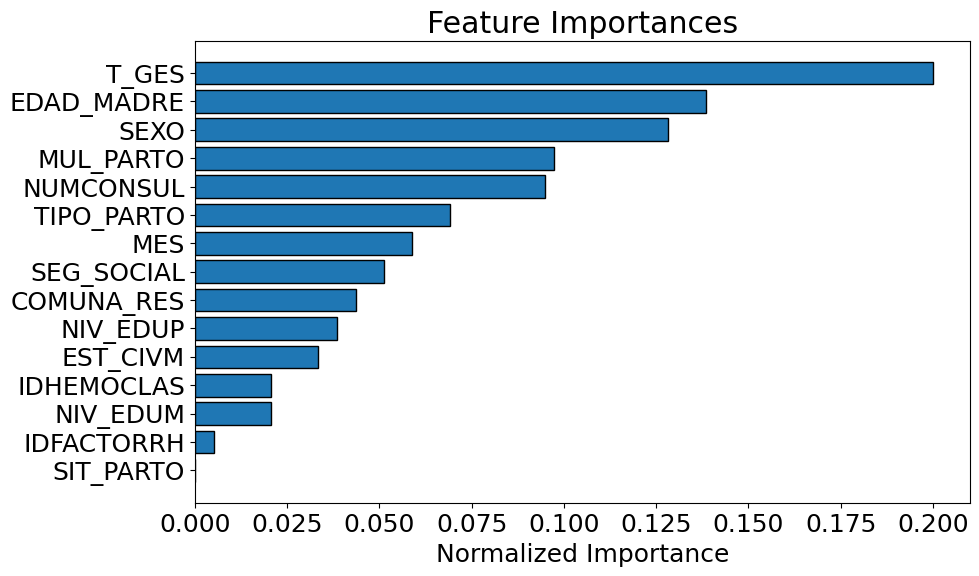

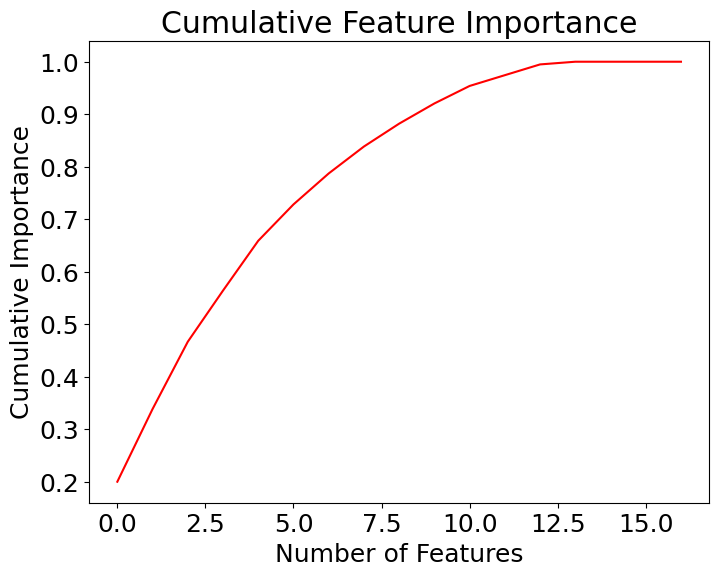

10 features required for 0.90 of cumulative importance


In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances)


In [ ]:
best7 = [5,11,2,8,6,7,3,14]

In [ ]:
norm_feature_importances

,index,feature,importance,importance_normalized,cumulative_importance
0,5,T_GES,39.0,0.200000,0.200000
1,11,EDAD_MADRE,27.0,0.138462,0.338462
2,2,SEXO,25.0,0.128205,0.466667
3,8,MUL_PARTO,19.0,0.097436,0.564103
4,6,NUMCONSUL,18.5,0.094872,0.658974
5,7,TIPO_PARTO,13.5,0.069231,0.728205
6,3,MES,11.5,0.058974,0.787179
7,14,SEG_SOCIAL,10.0,0.051282,0.838462
8,16,COMUNA_RES,8.5,0.043590,0.882051
9,15,NIV_EDUP,7.5,0.038462,0.920513


In [ ]:
idxImportant = norm_feature_importances['index'].values
idxImportant = idxImportant[:8]
idxImportant

array([ 5, 11,  2,  8,  6,  7,  3, 14])

In [ ]:
#train = train.drop(columns = zero_features)
train = train.iloc[:,idxImportant]
print('Training shape: ', train.shape)


Training shape:  (32110, 8)


In [ ]:
train.head()

,T_GES,EDAD_MADRE,SEXO,MUL_PARTO,NUMCONSUL,TIPO_PARTO,MES,SEG_SOCIAL
27052,20.0,21.0,0,0,3.0,0,4.0,0
27053,20.0,21.0,0,0,3.0,0,4.0,0
20947,20.0,17.0,0,1,1.0,0,1.0,1
31910,23.0,24.0,0,1,4.0,1,2.0,0
24057,21.0,21.0,0,1,2.0,0,8.0,0


In [ ]:
zero_features

['SIT_PARTO', 'ATEN_PAR', 'AREANAC']

In [ ]:
train['Yreg'] = Y1
train['Yclass'] = Y2

In [ ]:
train.to_csv('dataRelevant8Set.csv')

In [ ]:
train

,T_GES,EDAD_MADRE,SEXO,MUL_PARTO,NUMCONSUL,TIPO_PARTO,MES,SEG_SOCIAL,Yreg,Yclass
27052,20.0,21.0,0,0,3.0,0,4.0,0,305.0,0
27053,20.0,21.0,0,0,3.0,0,4.0,0,340.0,0
20947,20.0,17.0,0,1,1.0,0,1.0,1,380.0,0
31910,23.0,24.0,0,1,4.0,1,2.0,0,385.0,0
24057,21.0,21.0,0,1,2.0,0,8.0,0,390.0,0
...,...,...,...,...,...,...,...,...,...,...
13597,39.0,28.0,1,1,6.0,1,11.0,1,4620.0,1
548,39.0,28.0,1,1,8.0,1,8.0,0,4650.0,1
14410,41.0,27.0,0,1,6.0,1,1.0,0,4750.0,1
15094,40.0,42.0,0,1,7.0,1,1.0,0,5035.0,1


In [ ]:
aux= train['Yreg'].values

<StemContainer object of 3 artists>

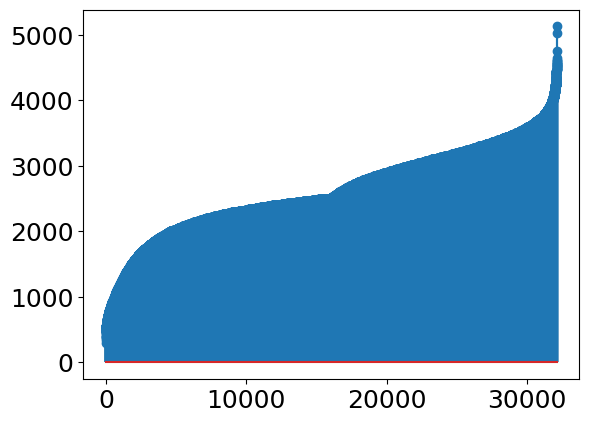

In [ ]:
plt.stem(aux)

In [ ]:
train = train.sort_values(by=['Yreg'])

In [ ]:
train

,AREANAC,SIT_PARTO,SEXO,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,Yreg,Yclass
27052,0,0,0,4.0,0,20.0,3.0,0,305.0,0
27053,0,0,0,4.0,0,20.0,3.0,0,340.0,0
20947,0,0,0,1.0,0,20.0,1.0,0,380.0,0
31910,0,0,0,2.0,0,23.0,4.0,1,385.0,0
24057,0,0,0,8.0,0,21.0,2.0,0,390.0,0
...,...,...,...,...,...,...,...,...,...,...
13597,0,0,1,11.0,0,39.0,6.0,1,4620.0,1
548,0,0,1,8.0,0,39.0,8.0,1,4650.0,1
14410,0,0,0,1.0,0,41.0,6.0,1,4750.0,1
15094,0,0,0,1.0,0,40.0,7.0,1,5035.0,1


In [ ]:
train2 =